# House of Price
## EDA — Análise Exploratória dos Dados

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses

### Sequencia de atribuições
| Etapa                | Limpeza | Tipo de limpeza recomendada                             |
| -------------------- | ------------ | ------------------------------------------------------- |
| Carregamento inicial | ✅ Sim        | Colunas completamente nulas, dtypes errados             |
| Início da EDA        | ⚠️ Parcial   | Olhar dados, visualizar distribuições, valores ausentes |
| Pós-gráficos         | ✅ Sim        | Remover outliers, preencher NaNs com base no contexto   |


### 1. Configurações Iniciais


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Configurações estéticas
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

# Carregando os dados
df = pd.read_csv("/home/akel/PycharmProjects/Kaggle/HousePrices/data/train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## 🧮 2. Visão Geral e Estatísticas Básicas

In [15]:
# Informações básicas
#df.info()

# Valores nulos
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
#print("Colunas com valores ausentes ou nulos:\n", missing)

# Estatísticas descritivas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 3. Distribuição do Preço de Venda (Target) 

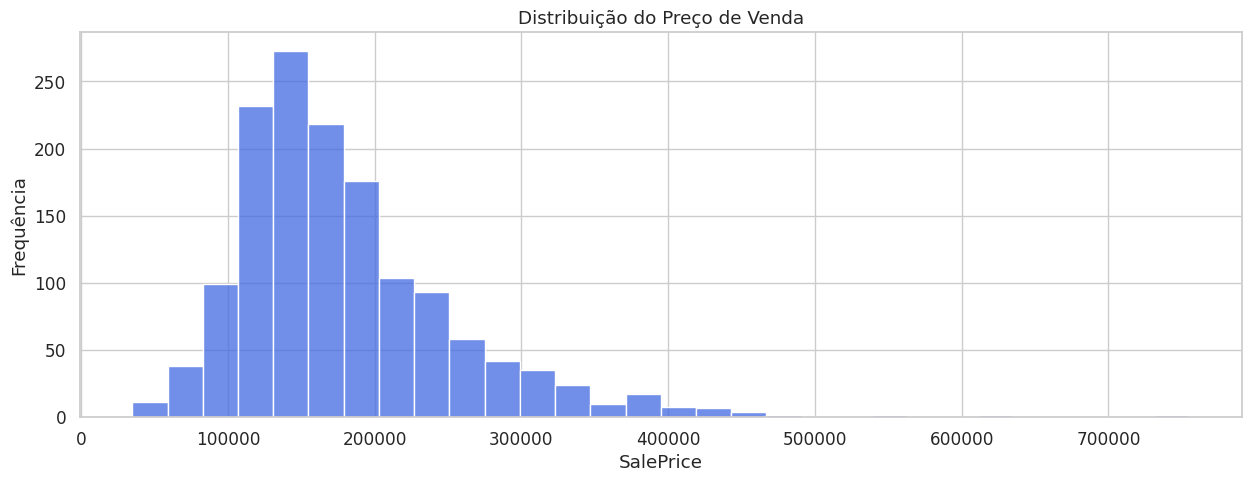

In [12]:

plt.figure(figsize=(15, 5))
sns.histplot(df["SalePrice"], color='royalblue', bins=30)
plt.title("Distribuição do Preço de Venda")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()

```markdown
🔍 **Observação:** A variável `SalePrice` apresenta uma assimetria positiva . Isso pode ser tratado com transformação logarítmica na modelagem.
```
---
### 4. Correlação com SalePrice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

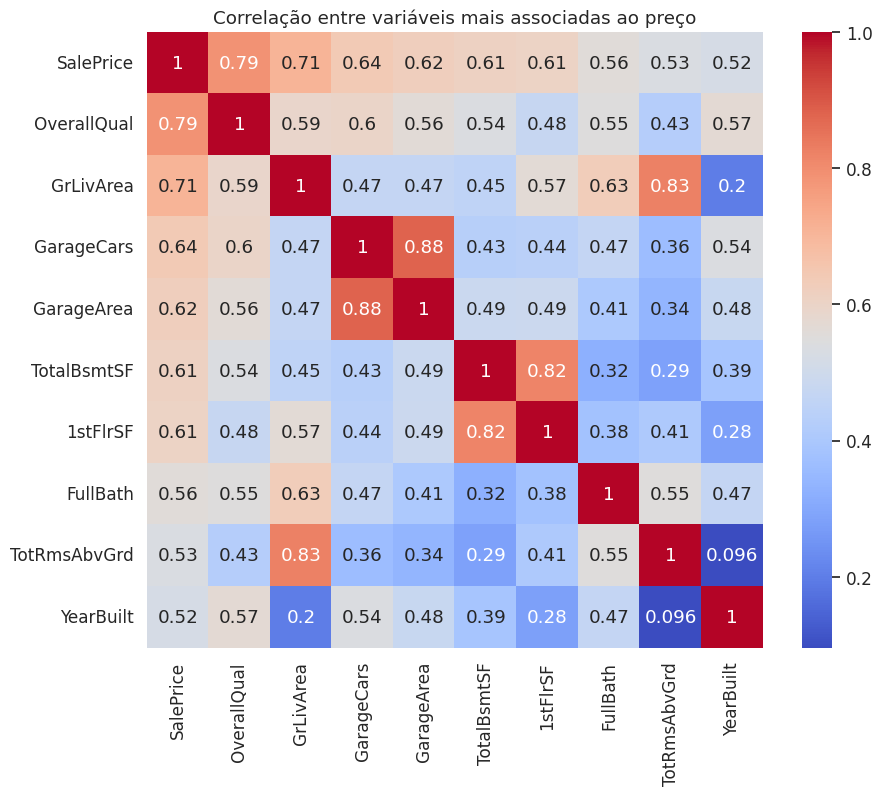

In [58]:
# Correlação com o preço de venda
corr = df.corr(numeric_only=True)   # realizar correlacao apenas nas variaveis numéricas                                 
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10) # c
#print("Top correlações com SalePrice:\n", top_corr)
display(top_corr)
# Heatmap das 10 principais variáveis
top_features = top_corr.index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlação entre variáveis mais associadas ao preço")
plt.show()

```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 5. Gráficos por variável (exemplos)

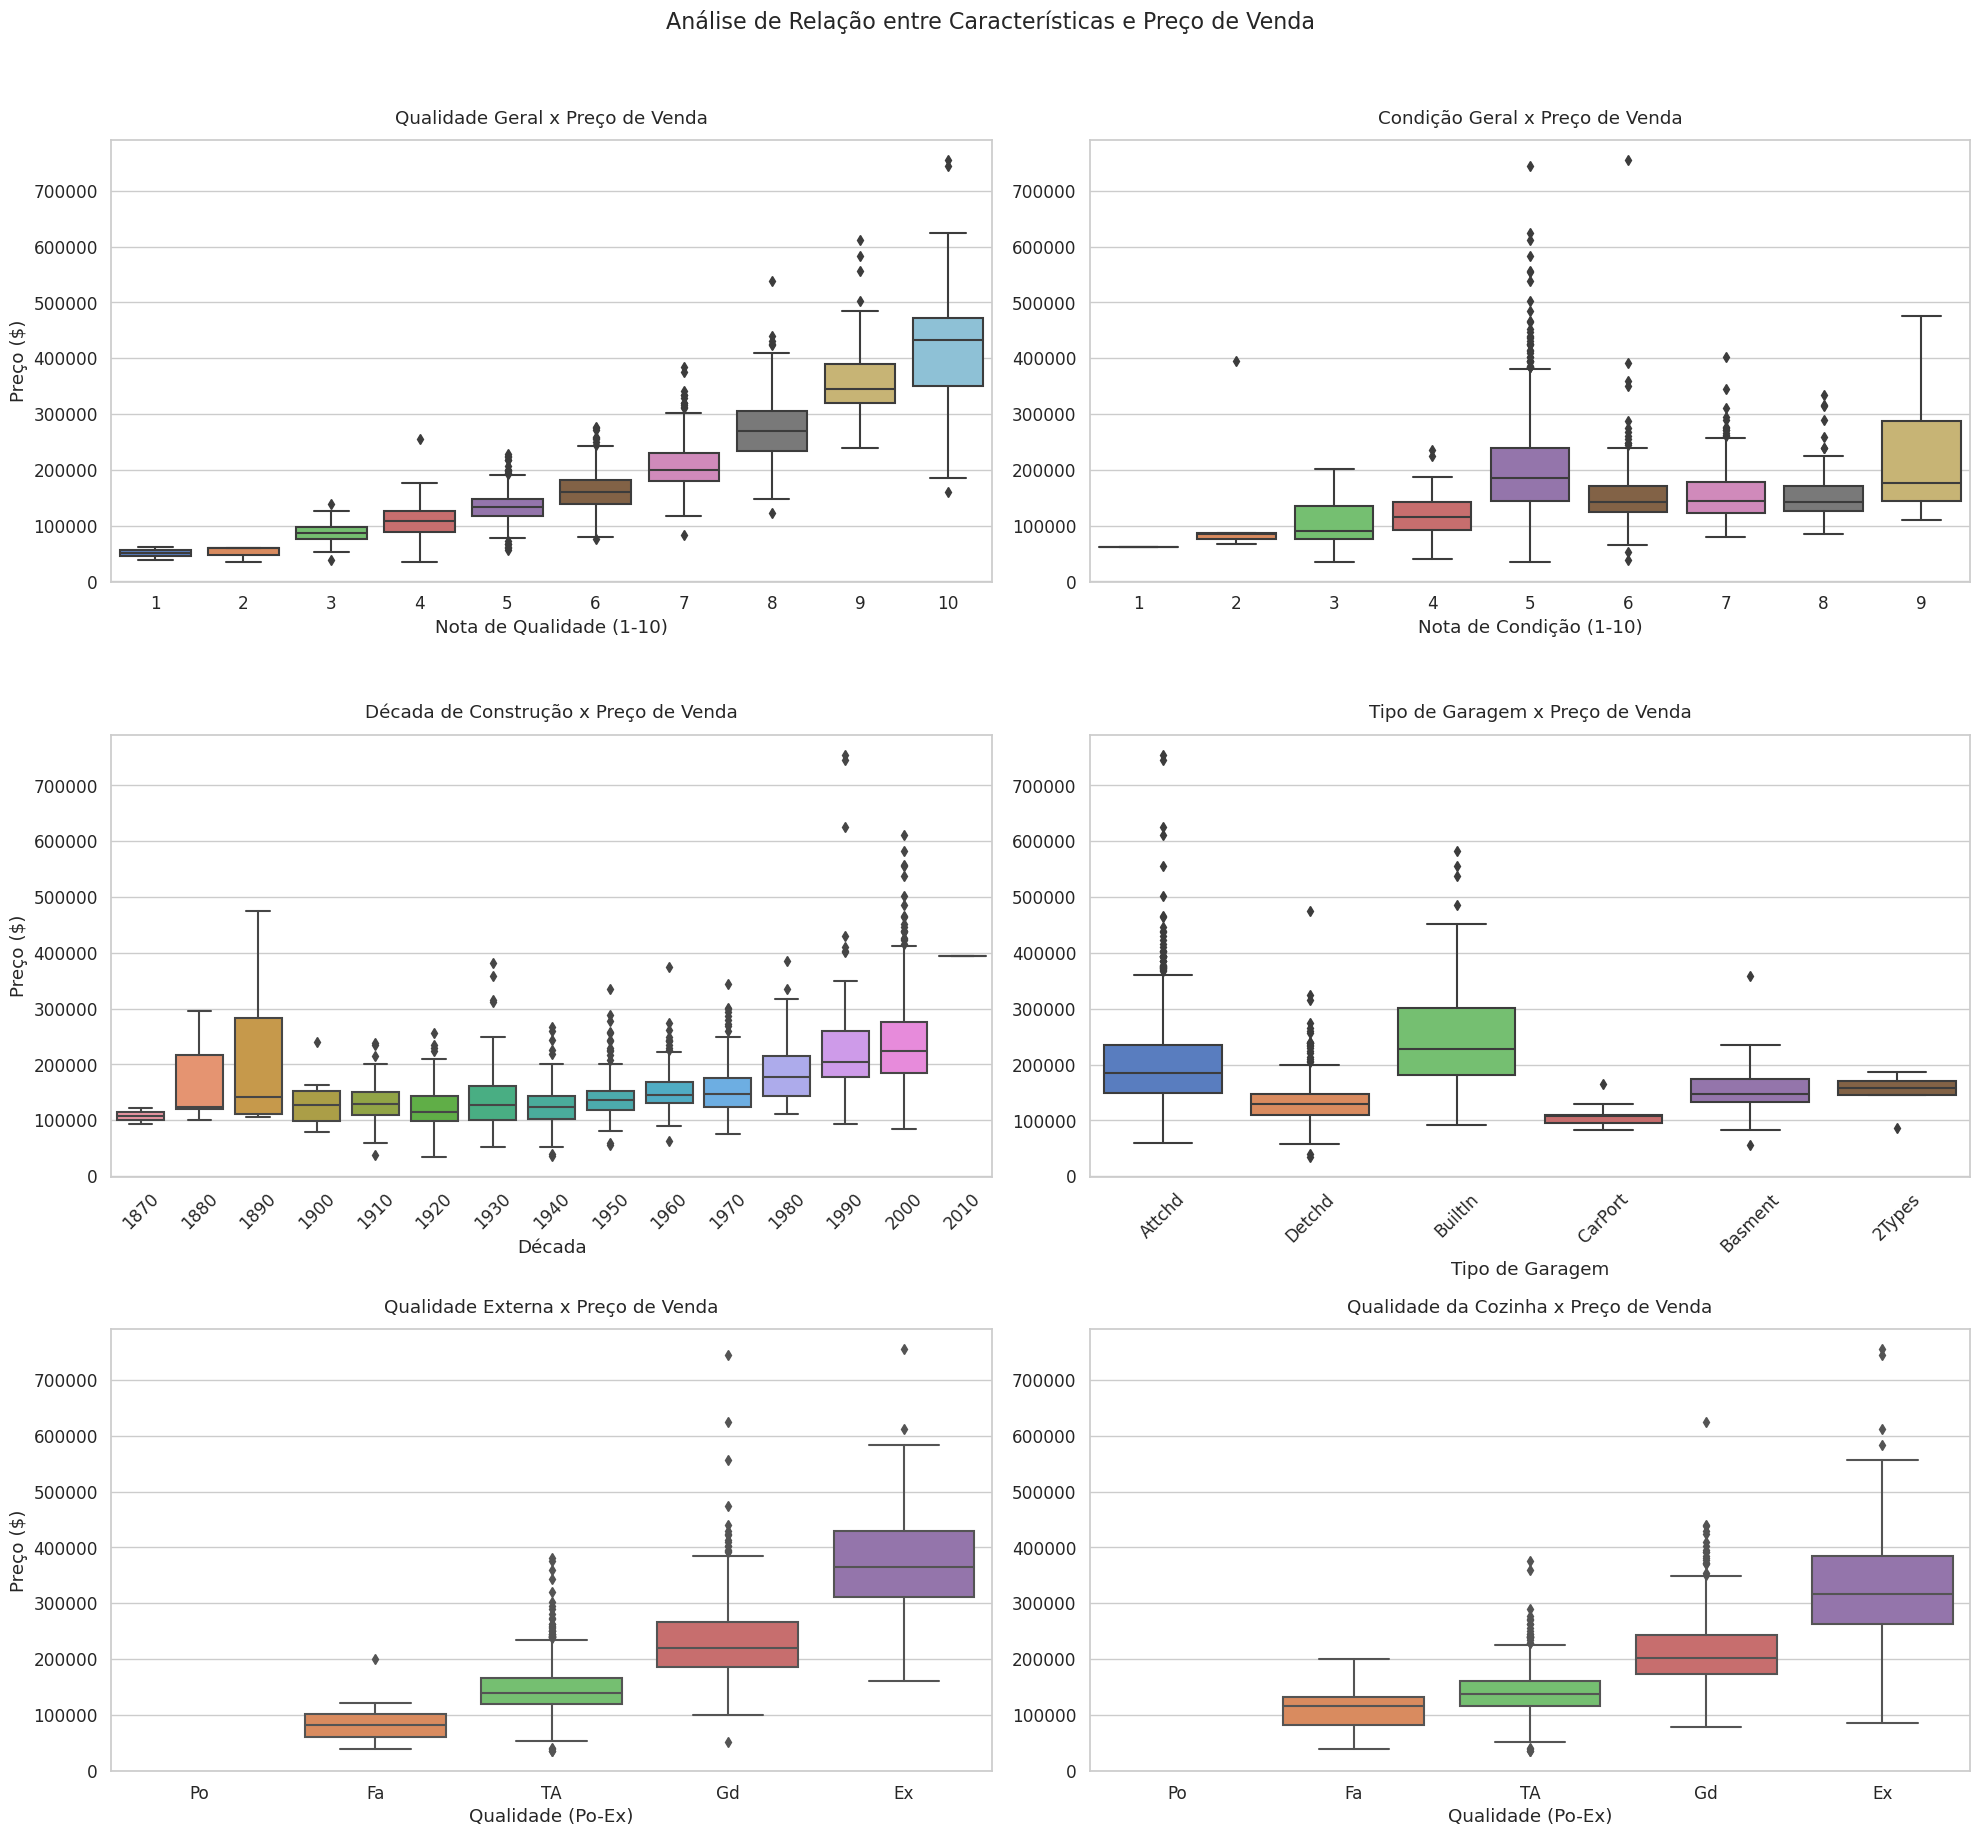

In [60]:
# Configuração da figura e eixos
fig, axs = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Análise de Relação entre Características e Preço de Venda', y=1.02, fontsize=16)

# Gráfico 1: Qualidade geral
sns.boxplot(data=df, x="OverallQual", y="SalePrice", ax=axs[0, 0])
axs[0, 0].set_title("Qualidade Geral x Preço de Venda", pad=12)
axs[0, 0].set_xlabel("Nota de Qualidade (1-10)")
axs[0, 0].set_ylabel("Preço ($)")

# Gráfico 2: Condição geral
sns.boxplot(x="OverallCond", y="SalePrice", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Condição Geral x Preço de Venda", pad=12)
axs[0, 1].set_xlabel("Nota de Condição (1-10)")
axs[0, 1].set_ylabel("")

# Gráfico 3: Década de construção
df["DecadeBuilt"] = (df["YearBuilt"] // 10) * 10
sns.boxplot(x="DecadeBuilt", y="SalePrice", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Década de Construção x Preço de Venda", pad=12)
axs[1, 0].set_xlabel("Década")
axs[1, 0].set_ylabel("Preço ($)")
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Tipo de garagem
sns.boxplot(x="GarageType", y="SalePrice", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Tipo de Garagem x Preço de Venda", pad=12)
axs[1, 1].set_xlabel("Tipo de Garagem")
axs[1, 1].set_ylabel("")
axs[1, 1].tick_params(axis='x', rotation=45)

# Gráfico 5: Qualidade externa
sns.boxplot(x="ExterQual", y="SalePrice", data=df, 
            order=["Po", "Fa", "TA", "Gd", "Ex"], ax=axs[2, 0])
axs[2, 0].set_title("Qualidade Externa x Preço de Venda", pad=12)
axs[2, 0].set_xlabel("Qualidade (Po-Ex)")
axs[2, 0].set_ylabel("Preço ($)")

# Gráfico 6: Qualidade da cozinha
sns.boxplot(x="KitchenQual", y="SalePrice", data=df, 
            order=["Po", "Fa", "TA", "Gd", "Ex"], ax=axs[2, 1])
axs[2, 1].set_title("Qualidade da Cozinha x Preço de Venda", pad=12)
axs[2, 1].set_xlabel("Qualidade (Po-Ex)")
axs[2, 1].set_ylabel("")

# Ajustes finais
plt.tight_layout()
plt.show()


```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 6-Outliers

4 casas com área de 4000 m2.


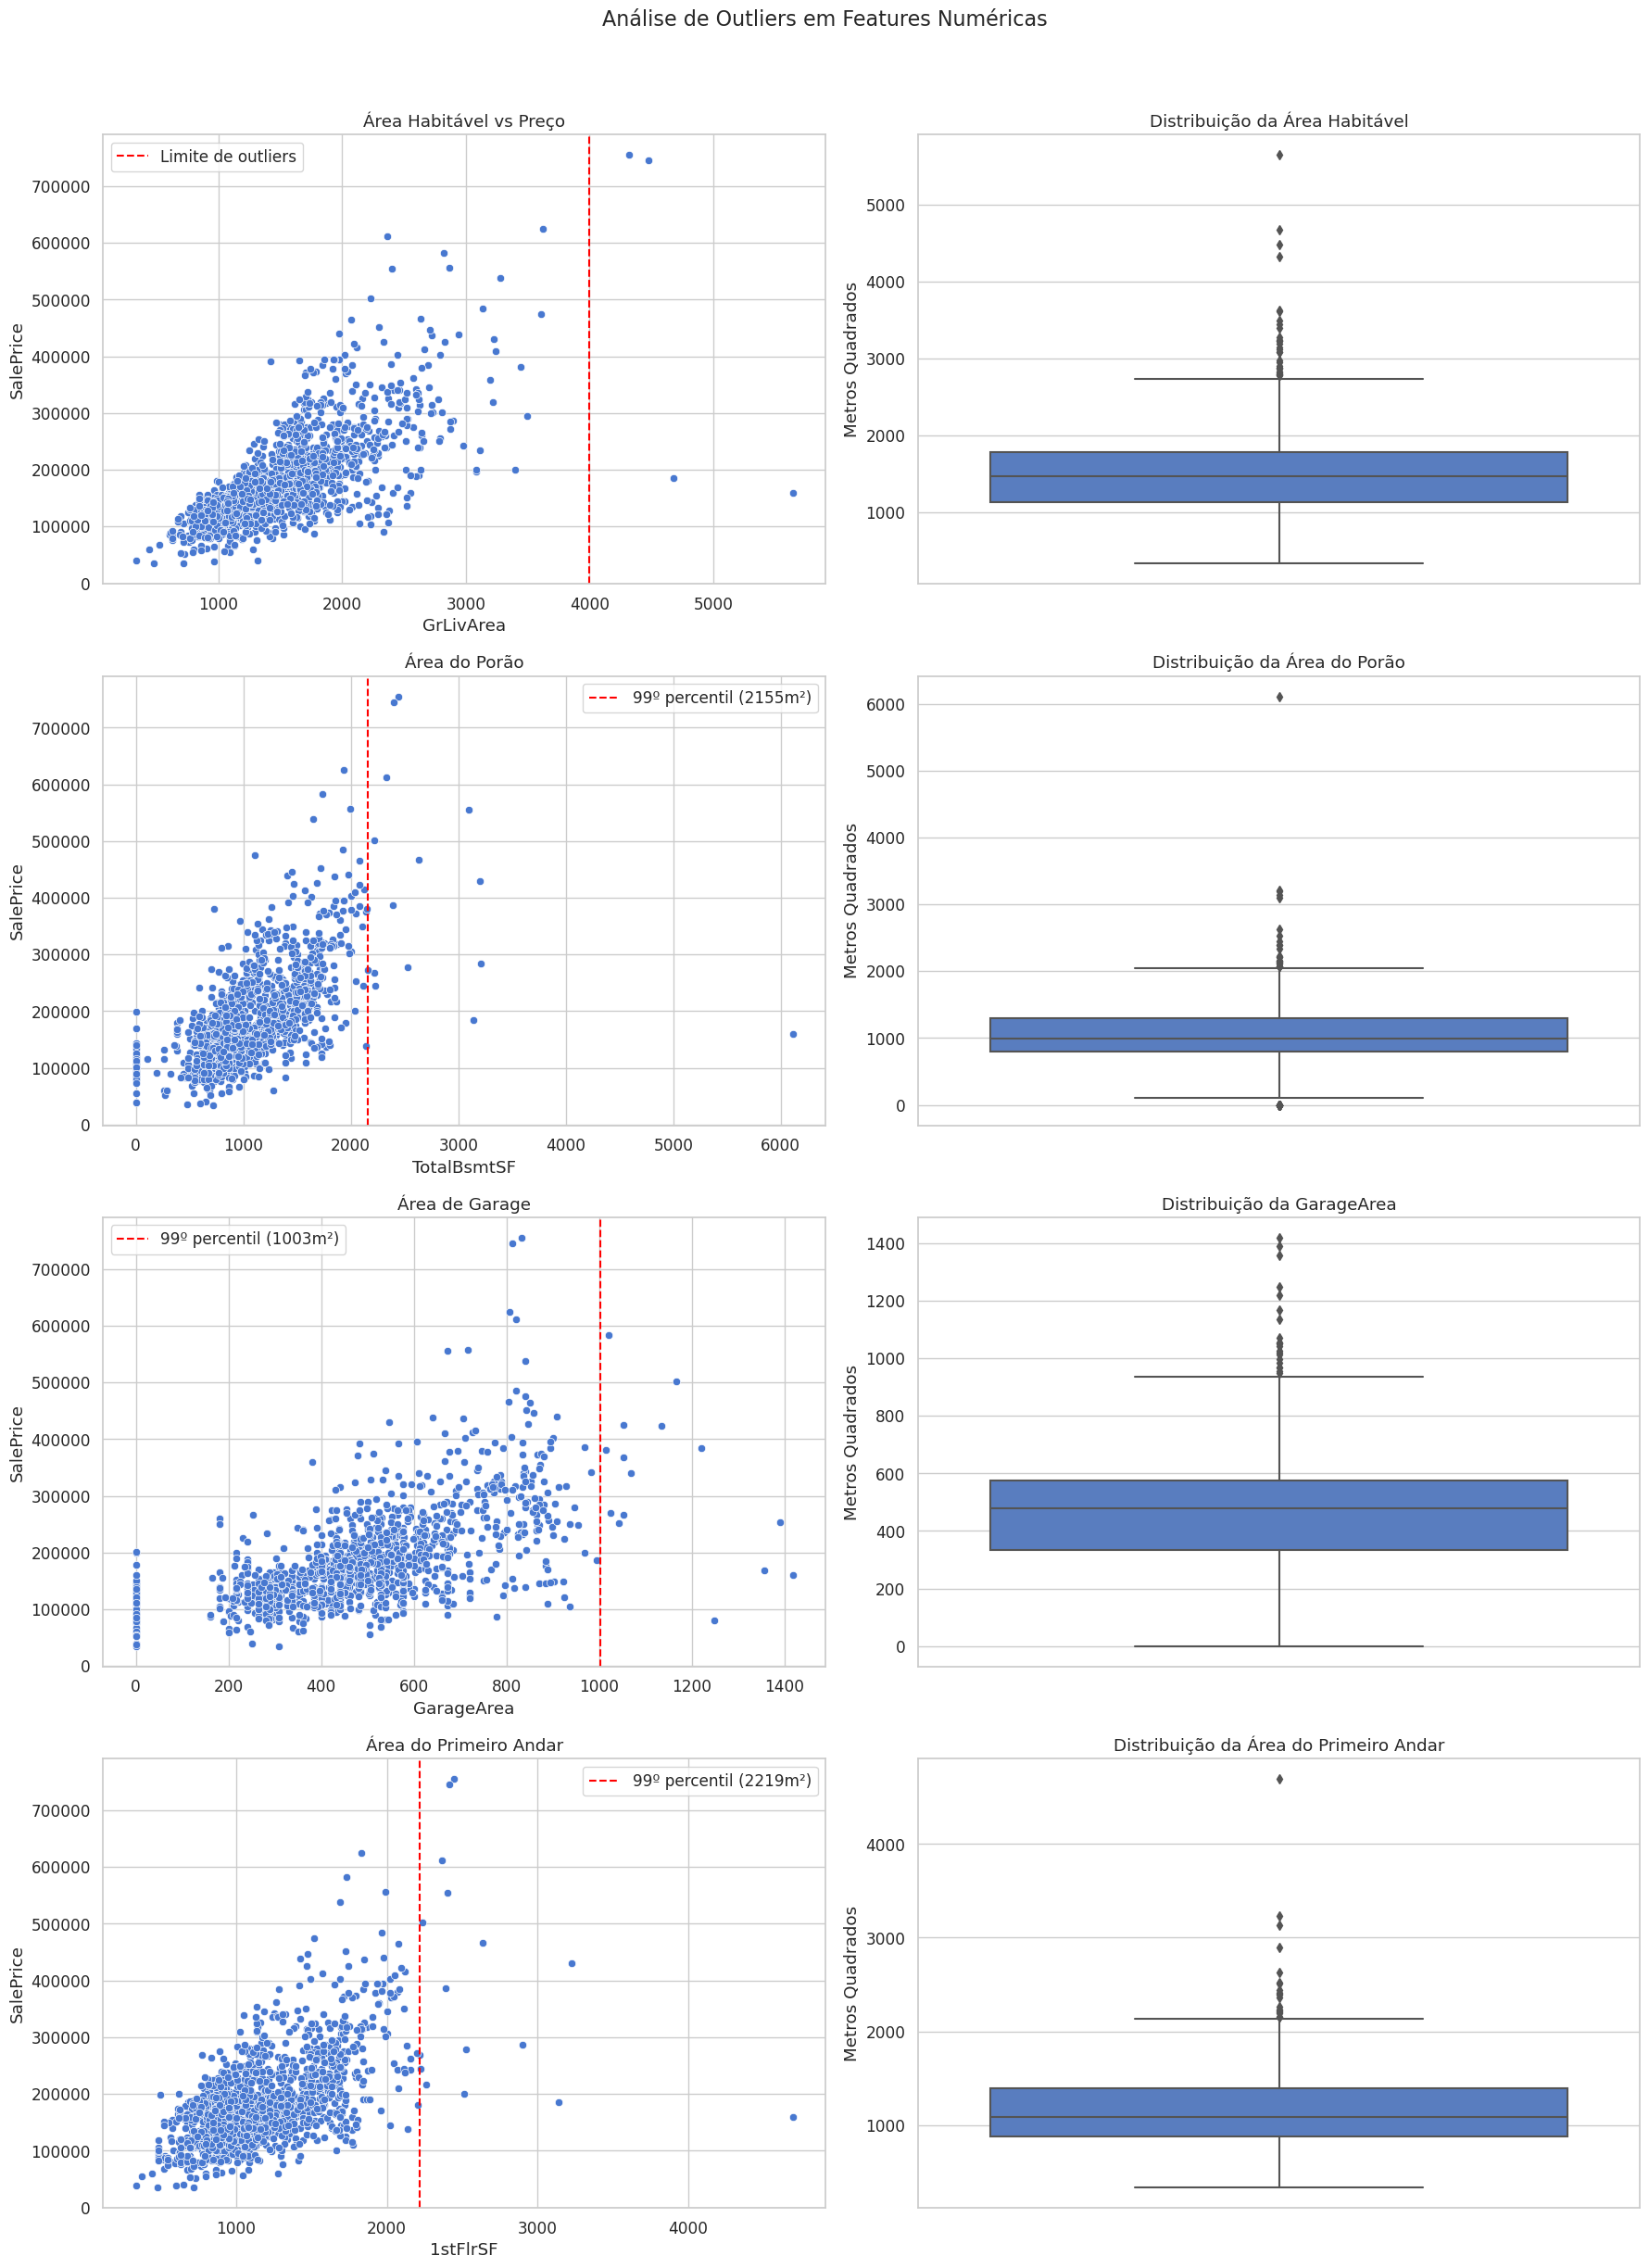

In [61]:
# Identificando outliers em área útil
# opc1. definindo valor
outliers = df[df["GrLivArea"] > 4000]
# Quantos estão acima de 4000?
outliers_GLA = df[df["GrLivArea"] > 4000 ]
print(f"{len(outliers_GLA )} casas com área de 4000 m2.")



# Configuração dos subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Análise de Outliers em Features Numéricas', y=1.02, fontsize=16)

# Gráfico 1 - Área Construída
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, ax=axs[0, 0])
axs[0, 0].axvline(4000, color='red', linestyle='--', label='Limite de outliers')
axs[0, 0].set_title("Área Habitável vs Preço")
axs[0, 0].legend()

# Gráfico 2 - Boxplot Área Construída
sns.boxplot(y=df["GrLivArea"], ax=axs[0, 1])
axs[0, 1].set_title("Distribuição da Área Habitável")
axs[0, 1].set_ylabel("Metros Quadrados")

# opc2. definindo percentual quantile

# Gráfico 3 - Área do Porão
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df, ax=axs[1, 0])
basement_thresh = df["TotalBsmtSF"].quantile(0.99)
axs[1, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[1, 0].set_title("Área do Porão")
axs[1, 0].legend()

# Gráfico 4 - Boxplot Área do Porão
sns.boxplot(y=df["TotalBsmtSF"], ax=axs[1, 1])
axs[1, 1].set_title("Distribuição da Área do Porão")
axs[1, 1].set_ylabel("Metros Quadrados")


# Gráfico 5 - Boxplot Área de Garage
sns.scatterplot(x="GarageArea", y="SalePrice", data=df, ax=axs[2, 0])
basement_thresh = df["GarageArea"].quantile(0.99)
axs[2, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[2, 0].set_title("Área de Garage")
axs[2, 0].legend()

# Gráfico 6 - Boxplot Área do Porão
sns.boxplot(y=df["GarageArea"], ax=axs[2, 1])
axs[2, 1].set_title("Distribuição da GarageArea")
axs[2, 1].set_ylabel("Metros Quadrados")


# Gráfico 7 - Boxplot Área de Garage
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df, ax=axs[3, 0])
basement_thresh = df["1stFlrSF"].quantile(0.99)
axs[3, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[3, 0].set_title("Área do Primeiro Andar")
axs[3, 0].legend()

# Gráfico 8 - Boxplot Área do Porão
sns.boxplot(y=df["1stFlrSF"], ax=axs[3, 1])
axs[3, 1].set_title("Distribuição da Área do Primeiro Andar")
axs[3, 1].set_ylabel("Metros Quadrados")


# Ajustes finais
plt.tight_layout()
plt.show()

# # Quantos estão acima do percentil 99?
# outliers_bsmt = df[df["TotalBsmtSF"] > df["TotalBsmtSF"].quantile(0.99)]
# print(outliers_bsmt[["TotalBsmtSF", "SalePrice"]])
# print(f"{len(outliers_bsmt)} casas com área de porão acima do percentil 99.")




Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_price = df[(df["SalePrice"] < lim_inf) | (df["SalePrice"] > lim_sup)]
#print(f"{len(outliers_price)} outliers detectados com base em IQR.")

```markdown
📌 **Nota:** 
```

---
### 7. Análise de Variáveis Categóricas 

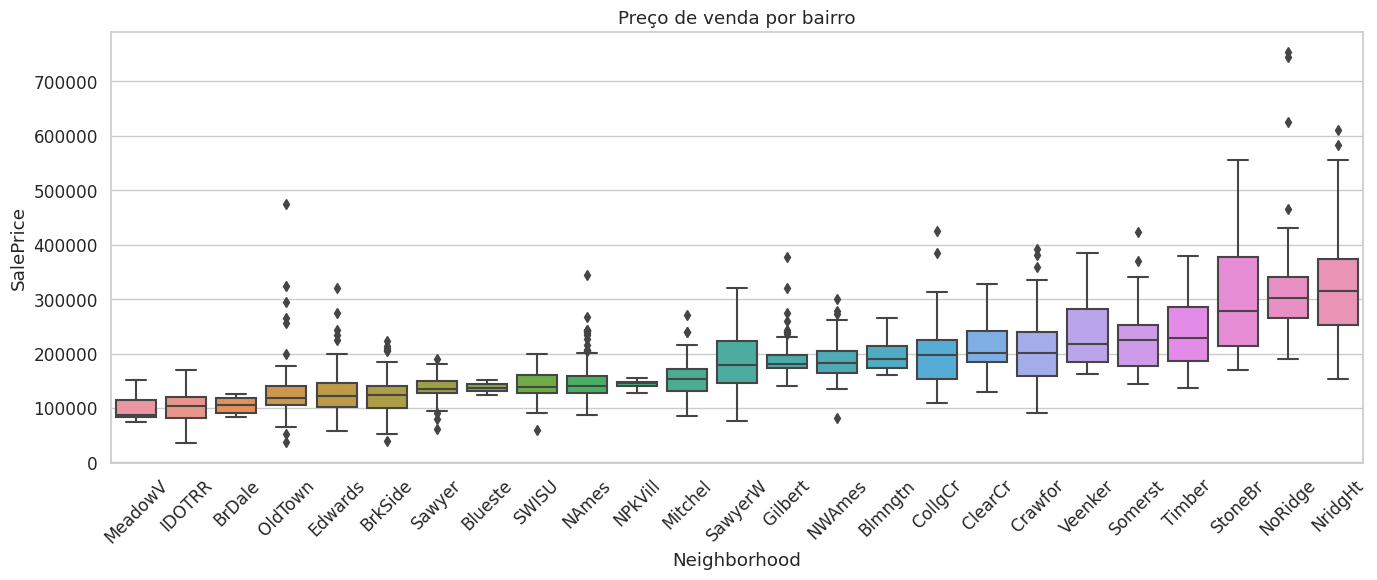

In [29]:
plt.figure(figsize=(14, 6))
order = df.groupby("Neighborhood")["SalePrice"].median().sort_values().index
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, order=order)
plt.xticks(rotation=45)
plt.title("Preço de venda por bairro")
plt.tight_layout()
plt.show()


```markdown
📌 **Nota:** 
```

## 💡  Insights Finais

🧠 **Principais descobertas da EDA:**

- `OverallQual`, `GrLivArea` e `GarageCars` têm forte correlação com o preço de venda.
- Variáveis como `Neighborhood`, `ExterQual` e `TotalBsmtSF` ajudam a explicar variações nos preços.
- A distribuição de `SalePrice` não é normal. Transformações podem ser úteis na modelagem.
- Outliers extremos foram detectados em `GrLivArea`, `TotalBsmtSF` e `GarageArea`. Devem ser tratados.


---

Próximos passos: limpeza de dados, transformação de variáveis e engenharia de features para modelagem.
